In [68]:
!pip install -r "requirments.txt"

In [18]:
import os
import tensorflow as tf
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

## Let's begin by introducing the Data directory, where our dataset is located

In [4]:
data_dir = "data"

## Create a TensorFlow dataset from the directory

In [36]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1203 files belonging to 2 classes.


## Convert the dataset to a numpy iterator

In [12]:
data_iterator = data.as_numpy_iterator()

## Fetch a batch of data and visualize it with its corresponding label

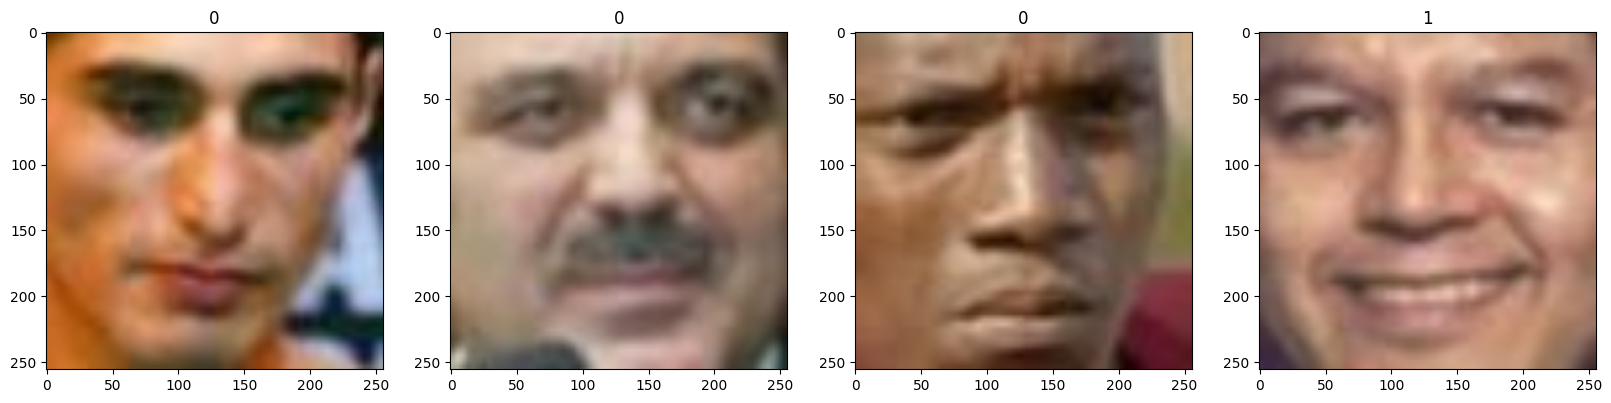

In [33]:
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scaling the images pixel to be in range of [0,1] and visualizing the scaled data using a random batch

In [37]:

data = data.map(lambda x,y: (x/255, y))

scaled_iterator = data.as_numpy_iterator()

batch = scaled_iterator.next()

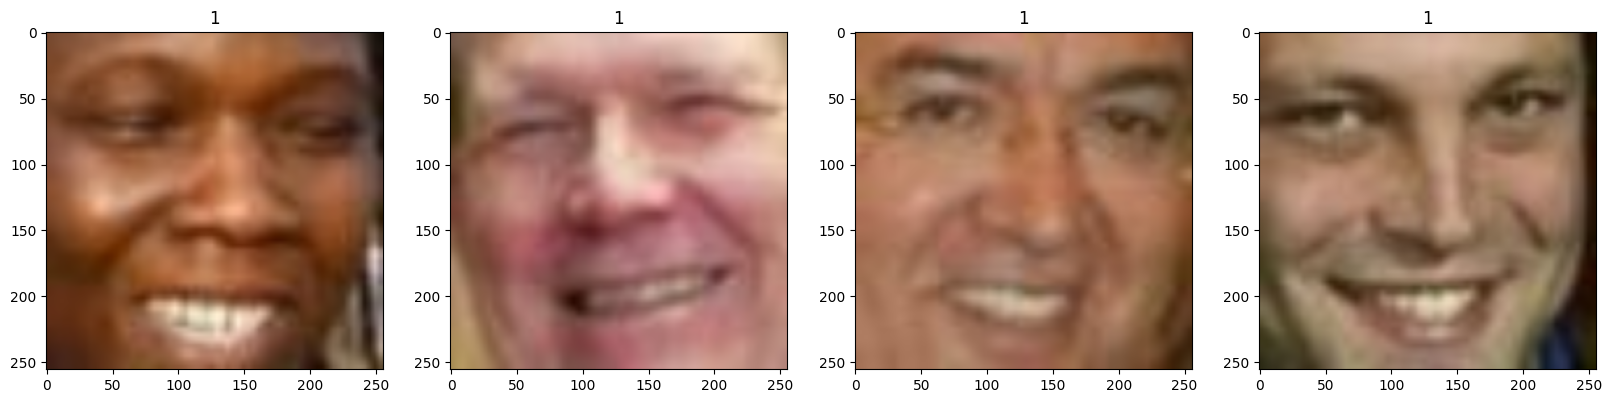

In [38]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## Calculate sizes for train, validation, and test sets

In [41]:

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

print(train_size) # In batches
print(val_size)
print(test_size)

26
8
4


## Create train, validation, and test datasets

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


## Implemeting a CNN Model to classify the images

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


C:\Users\20112\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## Creating log files to track the progress of the training and also to visualize it

In [21]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [22]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 983ms/step - accuracy: 0.5084 - loss: 0.8101 - val_accuracy: 0.5430 - val_loss: 0.6801
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 24s 906ms/step - accuracy: 0.6349 - loss: 0.6421 - val_accuracy: 0.7188 - val_loss: 0.4882
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 874ms/step - accuracy: 0.8346 - loss: 0.3799 - val_accuracy: 0.8828 - val_loss: 0.2759
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 888ms/step - accuracy: 0.8620 - loss: 0.3292 - val_accuracy: 0.8984 - val_loss: 0.3050
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 876ms/step - accuracy: 0.9067 - loss: 0.2386 - val_accuracy: 0.9219 - val_loss: 0.1984
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 947ms/step - accuracy: 0.9151 - loss: 0.1868 - val_accuracy: 0.9102 - val_loss: 0.2322
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 24s 909ms/step - accuracy: 0.9424 - loss: 0.1483 - val_accuracy: 0.9258 - val_loss: 0.1589
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 24s 902ms/step - accuracy: 0.9570 - loss: 0.1323 - val_accu

## Visualizing the loss scores and accuracy scores  during the training of the model

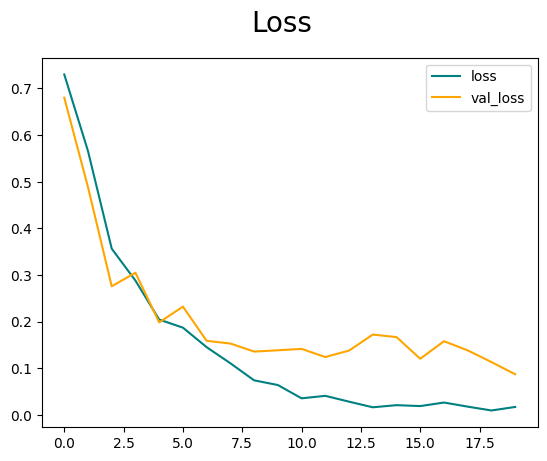

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

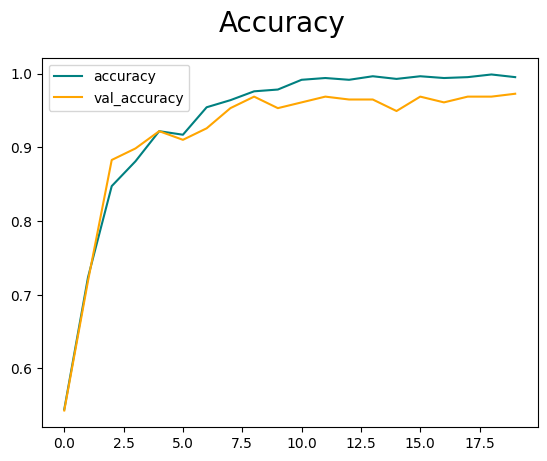

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluating the model on test set

In [66]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()
y_test=[]
y_predict=[]
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    yhat = [0 if image_score < 0.5 else 1 for image_score in yhat]
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    y_test.extend(y)
    y_predict.extend(yhat)
    
print(pre.result(), re.result(), acc.result())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9402985, shape=(), dtype=float32) tf.Tensor(0.96875, shape=(), dtype=float32)


## Looking for the Confusion Matrix on test set

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
def CalculateAndDrawConfusionMatrix(y_test , y_predict):
  conf_matrix = confusion_matrix(y_test,y_predict )
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=["NonSmile(0)" , "Smile(1)"])
  disp.plot()

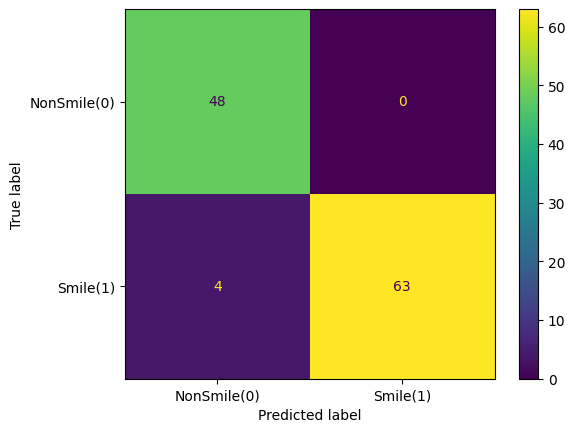

In [67]:
CalculateAndDrawConfusionMatrix(y_test , y_predict)

## Testing the model on a random image

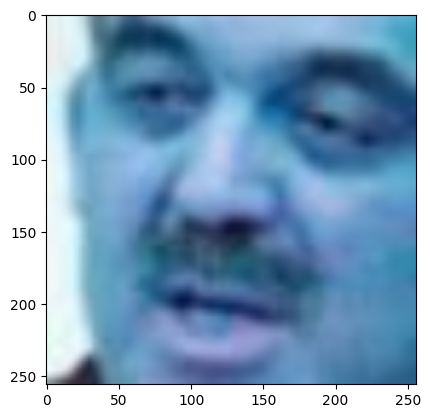

In [28]:
img = cv2.imread("test1.jpg")
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [29]:
yhat = model.predict(np.expand_dims(resize/255, 0))
print("Smiling" if yhat>0.5 else "Not Smiling")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Not Smiling


## Saving the model 

In [65]:
from tensorflow.keras.models import load_model

model.save(os.path.join('models','SmileOrNotModel.keras'))
